Dimensionality reduction: 
- More efficient storage and computation
- Remove less-informative "noise" features, which can cause problems for prediction tasks (classification, regression).

# Principal Component Analysis (PCA)

1. Finds center of the data (avg measure for each variable).
2. Shifts the data so that the center is on top of origin.
3. Finds the line of best fit for all points (least squares of points and line, or least squares of projection of points to line and origin). That line is now PC1.
4. PC2 is the line perpendicular to PC1 that passes through origin (for more dimensions, continue finding lines of best fit)
4. Find eigenvector (vector of PC with magnitude 1), eigenvalue (SSD of PC), and singular value (variation, sqrt of eigenvalue). Variation shows the importance of each new feature. 
6. Rotate everything so that PC1 is horizontal. PCs are decorrelated! (pearsonr=0)

## Grains Dataset

In [192]:
import pandas as pd
import numpy as np

In [193]:
grains = pd.read_csv("datasets/grains/seeds-width-vs-length.csv", names=["width", "length"])

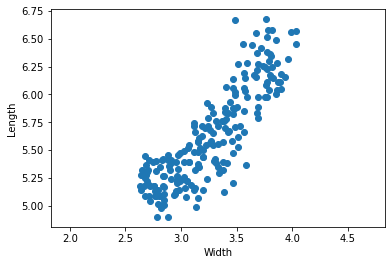

Correlation: 0.8604149377143469
p-value: 8.121332906192771e-63


In [194]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

width = grains.width
length = grains.length

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.xlabel("Width")
plt.ylabel("Length")
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(f"Correlation: {correlation}\np-value: {pvalue}")


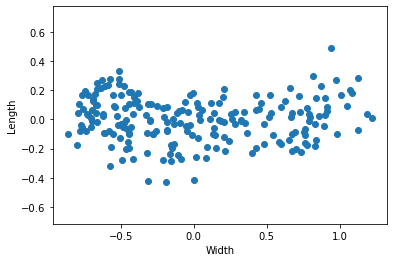

Correlation: -4.163336342344337e-17
p-value: 0.999999999999971


In [195]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys

plt.scatter(xs, ys)
plt.axis('equal')
plt.xlabel("Width")
plt.ylabel("Length")
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(f"Correlation: {correlation}\np-value: {pvalue}")

Because PCA rotates the data along the PC1, and PC2 is perpendicular to PC1, PC1 and PC2 should have a Pearson correlation of 0!

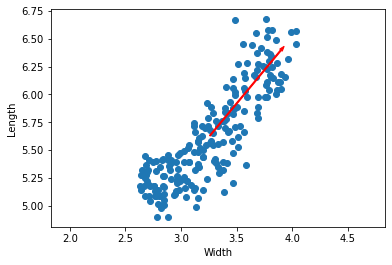

In [196]:
# Make a scatter plot of the untransformed points
plt.scatter(width, length)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.xlabel("Width")
plt.ylabel("Length")
plt.show()

This is a nice way of visualizing the PC1

### Intrinsic Dimension

Intrinsic Dimension: number of features needed to approximate a dataset 

In [197]:
print(f"Components:\n{model.components_}")
print(f"\nExplained variance:\n{model.explained_variance_}")
print(f"\nExplained variance ratio:\n{model.explained_variance_ratio_}")

Components:
[[ 0.63910027  0.76912343]
 [-0.76912343  0.63910027]]

Explained variance:
[0.31595462 0.02301882]

Explained variance ratio:
[0.93209254 0.06790746]


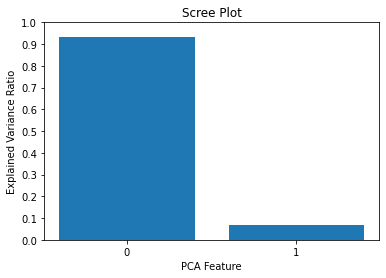

In [198]:
features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xticks(features)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Scree Plot")
plt.xlabel("PCA Feature")
plt.ylabel("Explained Variance Ratio")
plt.show()

- The scree plot is a line plot of the eigenvalues (variance) of factors or principal components in an analysis. Here we chose a bar plot to improve the visualization.

- PC0 alone explains 93% of the variance of the features, thus the intrinsic dimension of this dataset appears to be 1.

## Fish Dataset

In [199]:
fish = pd.read_csv("datasets/fish.csv", names=range(0,7))
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [200]:
fish[0].value_counts()

Bream    34
Roach    20
Pike     17
Smelt    14
Name: 0, dtype: int64

In [201]:
fish = pd.get_dummies(fish, drop_first=True)
fish.head()

,1,2,3,4,5,6,0_Pike,0_Roach,0_Smelt
0,242.0,23.2,25.4,30.0,38.4,13.4,0,0,0
1,290.0,24.0,26.3,31.2,40.0,13.8,0,0,0
2,340.0,23.9,26.5,31.1,39.8,15.1,0,0,0
3,363.0,26.3,29.0,33.5,38.0,13.3,0,0,0
4,430.0,26.5,29.0,34.0,36.6,15.1,0,0,0


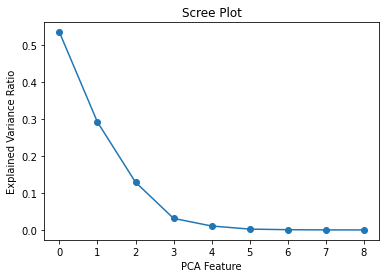

In [202]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(fish)

# Plot the explained variances
features = range(pca.n_components_)
plt.plot(features, pca.explained_variance_ratio_, "-o")
plt.title("Scree Plot")
plt.xlabel('PCA Feature')
plt.ylabel('Explained Variance Ratio')
plt.xticks()
plt.show()


- Since PCA features 0, 1, and 2 have significant variance, the intrinsic dimension of this dataset appears to be 3.

- PCA assumes that high variance features are informative, and this assumtion usually holds in practice.

- We can retain PCA features 0, 1, 2. We can discard the remaining features (noise) without losing much information. 

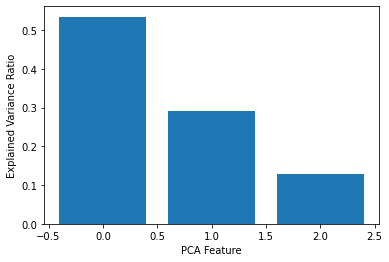

,0,1,2
0,139.179612,-41.518730,-63.825234
1,160.563522,-45.285151,-74.573220
2,181.327384,-48.749218,-85.011266
3,194.058679,-47.932877,-89.078467
4,222.114748,-52.015495,-102.591710
...,...,...,...
80,466.706465,-66.851837,-202.669337
81,597.214316,-84.762200,-266.725473
82,748.008159,-101.454126,-339.732109
83,727.231992,-98.654424,-329.103418


In [203]:
scaler = StandardScaler()
pca = PCA(n_components=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(fish)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA Feature')
plt.ylabel('Explained Variance Ratio')
plt.xticks()
plt.show()

# Apply PCA to fish dataset!
pca_fish = pca.transform(fish)
pd.DataFrame(pca_fish)

## t-SNE

- Maps samples to 2D or 3D space
- Aproximately preserves nearness of samples
- Great for data exploration!

In [204]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

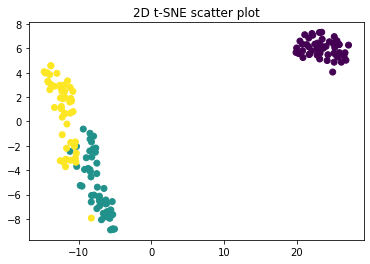

In [205]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100) # try out different learning rates (range 50 to 200)
transformed = tsne.fit_transform(X)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=y)
plt.title("2D t-SNE scatter plot")
plt.show()

c:\Users\rmari\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


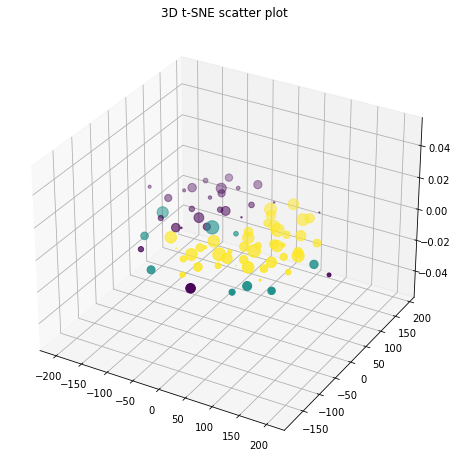

In [206]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, learning_rate=250)
transformed = tsne.fit_transform(X)

xs = transformed[:,0]
ys = transformed[:,1]
zs = transformed[:,2]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
plt.title("3D t-SNE scatter plot")
plt.scatter(xs, ys, zs, c=y)
plt.show()

# Clustering

## K-means

1. Select k
2. Randomly select k data points (new cluster centroids)
3. Measure euclidian distance from points to each cluster centroid, and assign to nearest cluster
4. Calculate the mean of each cluster, that becomes the new centroid
5. Iterate over steps 3 and 4 until the centroids do not change
6. Calculate the variance of each cluster and sum

Repeat the process multiple times and select the model that yields the least variation.

In [207]:
fish = pd.read_csv("datasets/fish.csv", names=range(0,7))
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [208]:
fish = pd.get_dummies(fish, drop_first=True)
fish.head()

,1,2,3,4,5,6,0_Pike,0_Roach,0_Smelt
0,242.0,23.2,25.4,30.0,38.4,13.4,0,0,0
1,290.0,24.0,26.3,31.2,40.0,13.8,0,0,0
2,340.0,23.9,26.5,31.1,39.8,15.1,0,0,0
3,363.0,26.3,29.0,33.5,38.0,13.3,0,0,0
4,430.0,26.5,29.0,34.0,36.6,15.1,0,0,0


c:\Users\rmari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


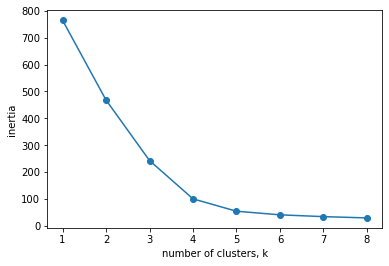

In [209]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

ks = range(1, 9)
inertias = []
centroids = []

scaler = StandardScaler()

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k)
    
    # Create pipeline: pipeline
    pipeline = make_pipeline(scaler, kmeans)

    # Fit model to samples
    pipeline.fit(fish)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    centroids.append(kmeans.cluster_centers_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


Elbow plot elucidates what can be a good number of k clusters

In [210]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(fish)
labels = pipeline.predict(fish)

print(kmeans.cluster_centers_)
print(labels)

[[-0.73862889 -0.59644621 -0.60121795 -0.62121594 -0.13036046  0.82619081
  -0.5         1.80277564 -0.44405304]
 [ 0.51293393  0.26647326  0.29583779  0.40133554  1.11896779  0.6086398
  -0.5        -0.5547002  -0.44405304]
 [ 0.75774295  1.34882435  1.31466195  1.18889657 -1.18899259 -1.15468304
   2.         -0.5547002  -0.44405304]
 [-1.11062898 -1.43294149 -1.45595564 -1.5308808  -1.08748725 -1.2562827
  -0.5        -0.5547002   2.25198325]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]


## Hierarchical Clustering

- Orders rows/columns based on similarity (euclidian or manhatan distance) to make it easier to see correlations in the data. 

- Associated with heatmaps and dendograms!

0. Each data point begins in a separate cluster. 
1. Find out which 2 data points are most similar / closest. 
2. Those 2 data points now become cluster 1, and are treated as a single data point.
3. Reapeat until all is left is 2 clusters, and merge.

In [211]:
eurovision = pd.read_csv("datasets/eurovision_2016.csv")
eurovision.head(10)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
5,Albania,Italy,4,10,3,7,2,3,2,8.0,10.0
6,Albania,Israel,10,2,18,4,12,8,17,3.0,NaN
7,Albania,Bulgaria,11,3,6,13,6,7,3,4.0,8.0
8,Albania,Sweden,16,8,15,6,15,11,8,NaN,3.0
9,Albania,Germany,18,17,20,11,17,18,15,NaN,NaN


In [212]:
eurovision_ct = pd.crosstab(index=eurovision["From country"], columns=eurovision["To country"], values=eurovision["Televote Points"], aggfunc=sum)
eurovision_ct.head()

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,2.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,4.0,0.0,5.0,7.0,0.0,0.0,3.0,0.0,6.0,0.0
Armenia,NaN,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,...,0.0,5.0,1.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
Australia,0.0,NaN,3.0,0.0,12.0,10.0,0.0,0.0,0.0,7.0,...,1.0,6.0,0.0,5.0,0.0,2.0,0.0,0.0,8.0,4.0
Austria,0.0,3.0,NaN,0.0,0.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,12.0,8.0,4.0,0.0,7.0,6.0,10.0,0.0
Azerbaijan,0.0,2.0,0.0,NaN,0.0,8.0,0.0,0.0,0.0,4.0,...,0.0,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0


In [213]:
eurovision_ct = eurovision_ct.replace(np.nan, 5)

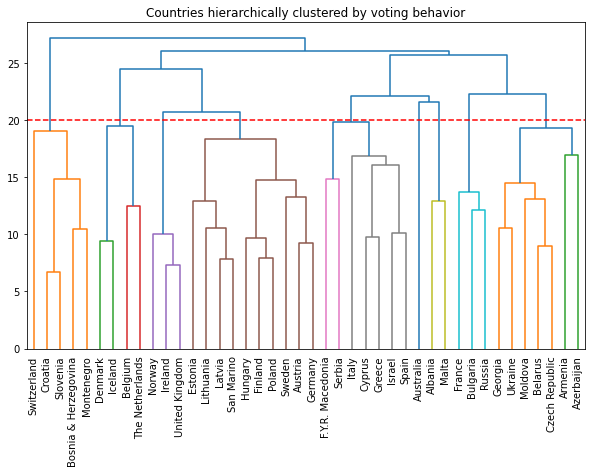

In [214]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Calculate the linkage: mergings
mergings = linkage(eurovision_ct, method="complete") 

# In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. 
# In single linkage, the distance between clusters is the distance between the closest points of the clusters.

# Plot the dendrogram, using varieties as labels
fig, ax = plt.subplots(figsize=(10, 6))
plt.axhline(y=20, color='r', linestyle='--')
plt.title("Countries hierarchically clustered by voting behavior")
dendrogram(mergings, labels=eurovision_ct.index, leaf_rotation=90, leaf_font_size=10)
plt.show()


(The y axis specifies the distance between 2 clusters!)

In [215]:
labels = fcluster(mergings, 20, criterion="distance")
print(labels)

[6 9 7 4 9 9 2 1 8 1 5 9 2 4 5 4 8 9 4 5 4 2 3 5 5 4 4 6 9 1 3 4 8 4 5 1 5
 4 1 2 9 3]


In [216]:
eurovision_ct["labels"] = labels
eurovision_ct.head()

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom,labels
From country,,,,,,,,,,,,,,,,,,,,,
Albania,2.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,5.0,7.0,0.0,0.0,3.0,0.0,6.0,0.0,6
Armenia,5.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,...,5.0,1.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0,9
Australia,0.0,5.0,3.0,0.0,12.0,10.0,0.0,0.0,0.0,7.0,...,6.0,0.0,5.0,0.0,2.0,0.0,0.0,8.0,4.0,7
Austria,0.0,3.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,...,0.0,12.0,8.0,4.0,0.0,7.0,6.0,10.0,0.0,4
Azerbaijan,0.0,2.0,0.0,5.0,0.0,8.0,0.0,0.0,0.0,4.0,...,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0,9


t_SNE

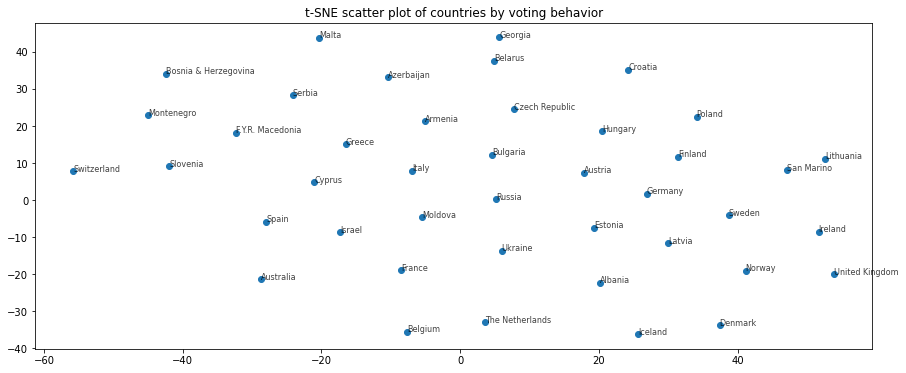

In [241]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100)
transformed = tsne.fit_transform(eurovision_ct)


xs = transformed[:,0]
ys = transformed[:,1]
fig = plt.figure(figsize=(15, 6))
plt.title("t-SNE scatter plot of countries by voting behavior")
plt.scatter(xs, ys)

# Annotate the points
for x, y, country in zip(xs, ys, eurovision_ct.index):
    plt.annotate(country, (x, y), fontsize=8, alpha=0.75)
plt.show()